### ⚙️ Import Libraries

In [5]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ["KERAS_BACKEND"] = "torch"
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import PyTorch (for backend operations and random seed)
import torch
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Import Keras (standalone version)
import keras
from keras import layers
from keras import losses
from keras import optimizers
from keras.models import Sequential, Model

# Print versions
print(f"PyTorch version: {torch.__version__}")
print(f"Keras version: {keras.__version__}")

# Import other libraries
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from PIL import Image
import matplotlib.gridspec as gridspec
import requests
from io import BytesIO

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

PyTorch version: 2.2.2
Keras version: 3.9.2


2025-04-28 11:21:30.867811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#load the cards dataset
# Caricamento delle Immagini
dataset_dir = "data/52_cards"

# Funzione per caricare tutte le immagini dalla directory specificata
def load_images_from_directory(directory):
    images = []  # Lista per memorizzare le immagini caricate
    
    # Itera attraverso i file nella directory
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Filtra i file immagine
                file_path = os.path.join(root, file)  # Percorso completo del file
                try:
                    # Carica l'immagine utilizzando PIL
                    img = Image.open(file_path).convert('RGB')  # Converte in RGB
                    images.append(np.array(img))  # Converte in array NumPy e aggiunge alla lista
                except Exception as e:
                    print(f"Errore nel caricamento dell'immagine {file_path}: {e}")
    
    return images

# Carica le immagini dalla directory del dataset
images = load_images_from_directory(dataset_dir)

## ⏳ Load Data

## 🔎 Inspect Data

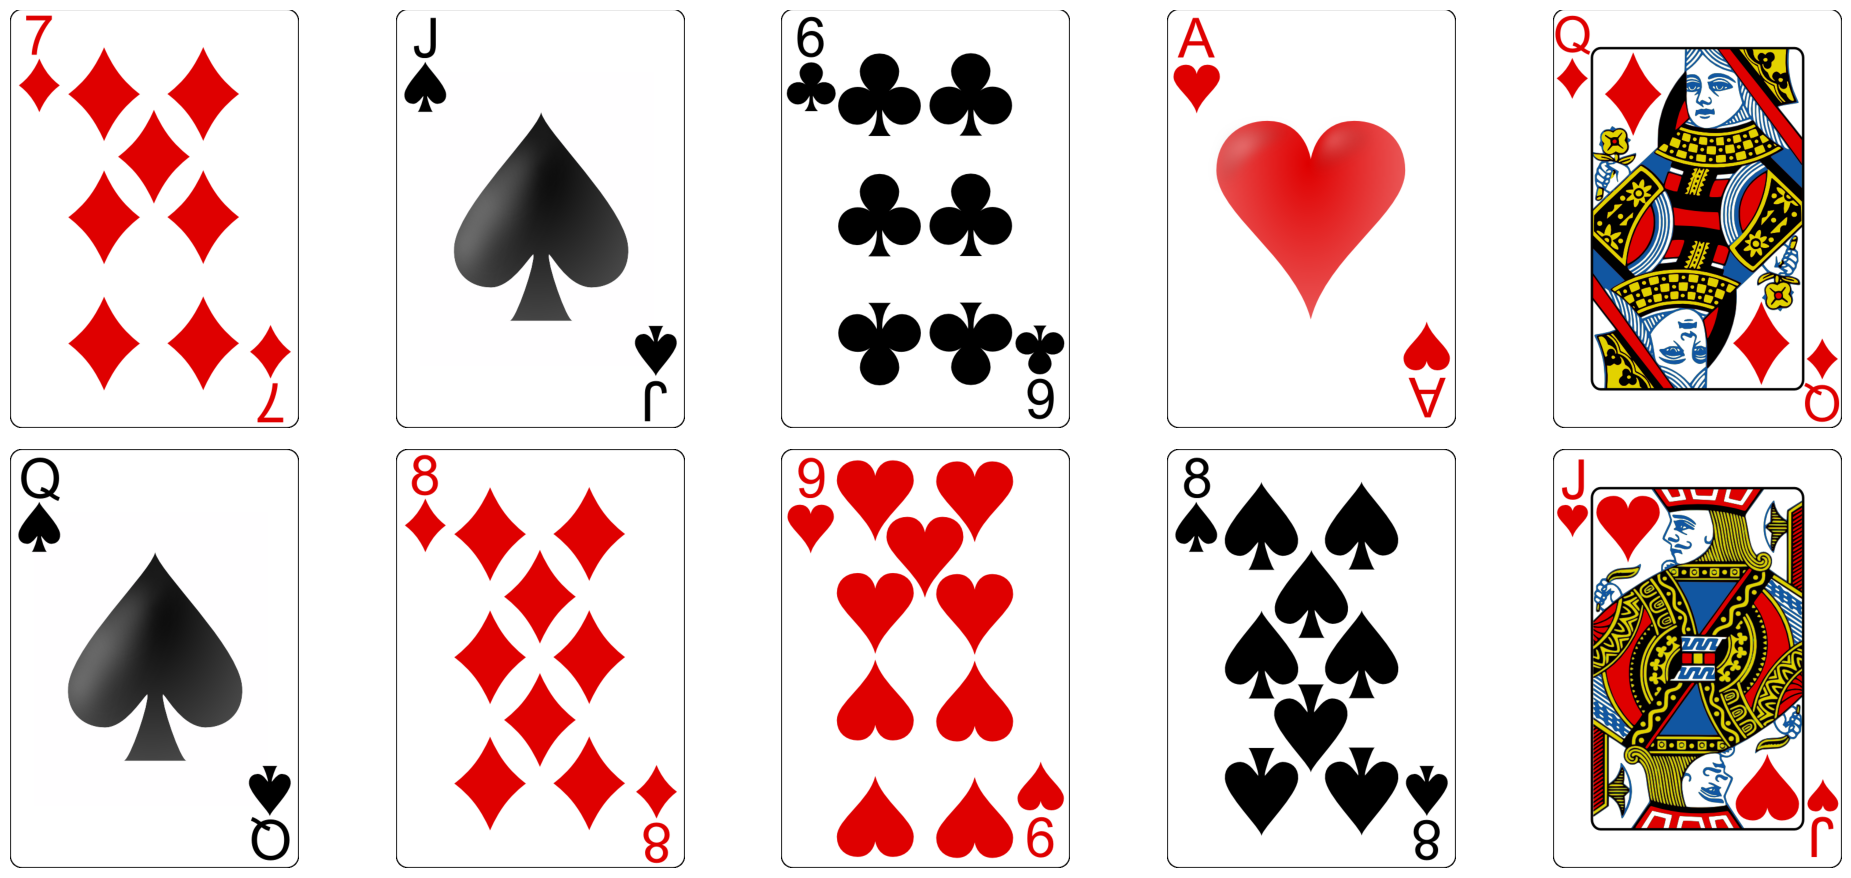

In [9]:
# Number of images to display
num_img = 10

# Create subplots for displaying items
fig, axes = plt.subplots(2, num_img//2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i%2, i%num_img//2]
    ax.imshow(np.clip(images[i], 0, 255))  # Display clipped item images
    ax.axis('off')
plt.tight_layout()
plt.show()

## 💪 Image Augmentaion

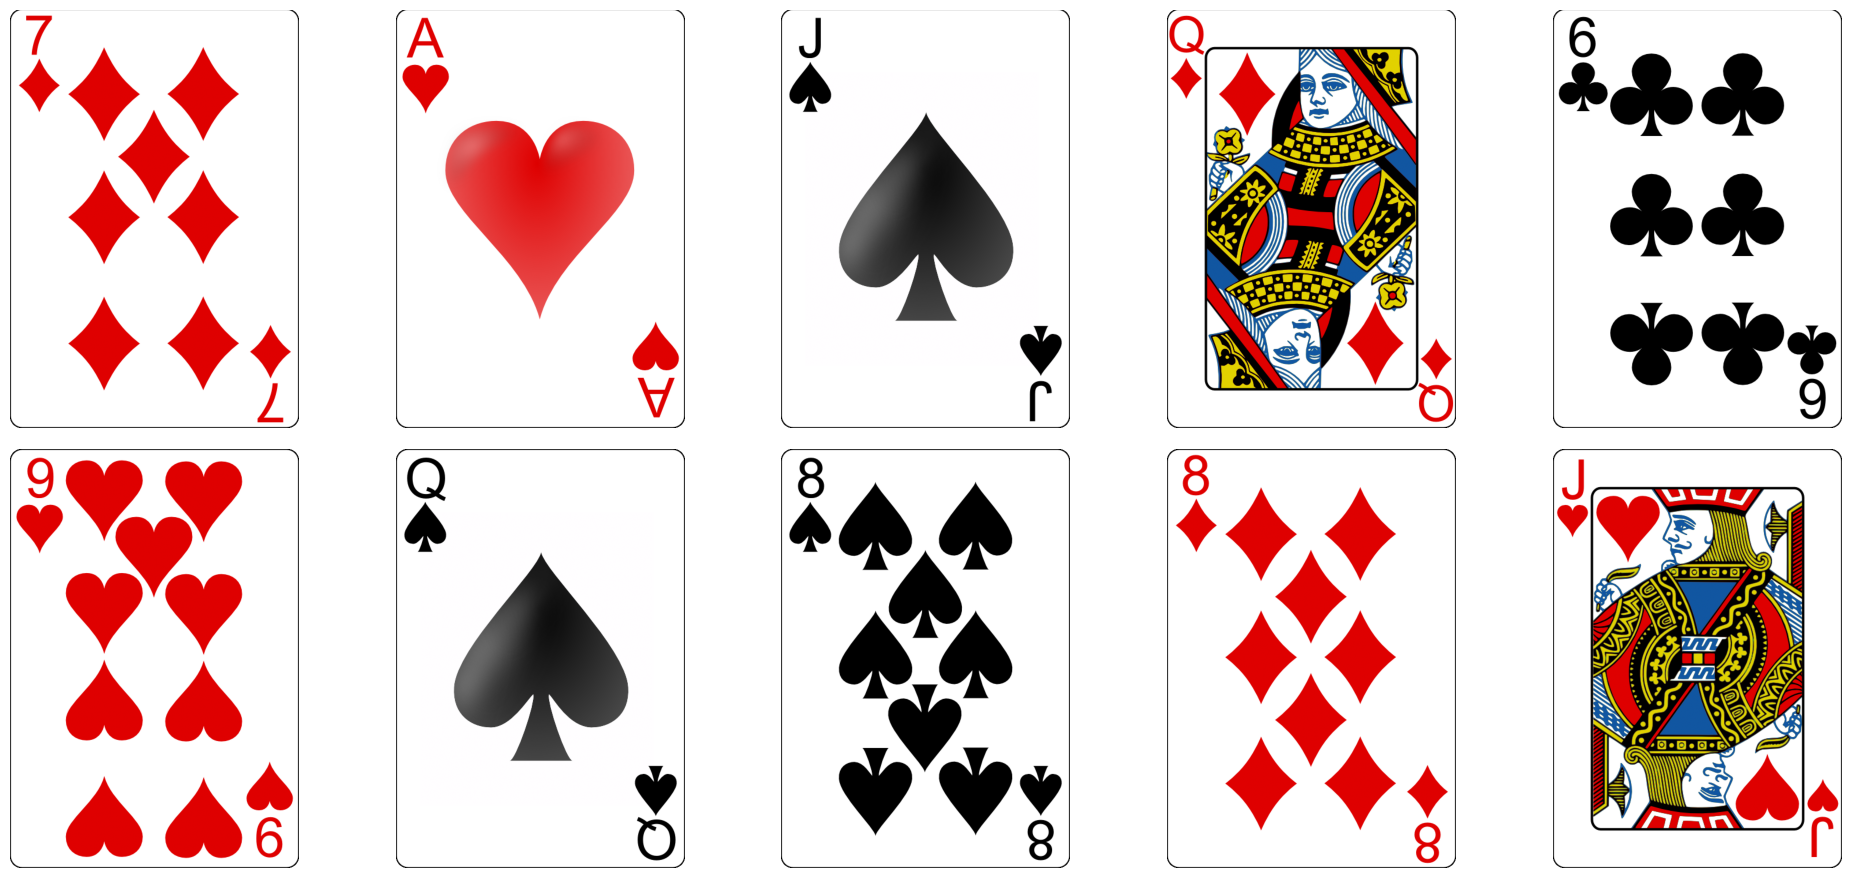

In [12]:
# Normalize pixel values of the images
normalized_images = [img / 255.0 for img in images]

# Display a subset of the normalized images
# Display the first 10 images
num_img = 10
# Create subplots for displaying items
fig, axes = plt.subplots(2, num_img // 2, figsize=(20, 9))
for i in range(num_img):
    ax = axes[i % 2, i % (num_img // 2)]
    ax.imshow(np.clip(normalized_images[i], 0, 1))  # Display normalized images
    ax.axis('off')
plt.tight_layout()
plt.show()

#### Random Flip

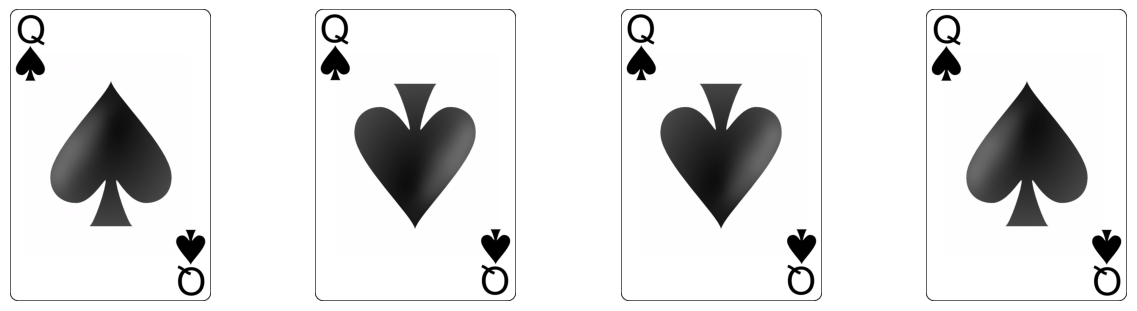

In [16]:
# Define a sequential model for image augmentation with random flipping
augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
])

# Set up the figure and grid layout for displaying images
fig = plt.figure(constrained_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], wspace=0.1)

#pick an image from the dataset
img = normalized_images[1]
# Display the original image
ax1 = fig.add_subplot(gs[0])
ax1.imshow(np.squeeze(img))
ax1.axis('off')

# Apply augmentation and display the first augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(np.squeeze(augmented_img))
ax2.axis('off')

# Apply augmentation again and display the second augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax3 = fig.add_subplot(gs[2])
ax3.imshow(np.squeeze(augmented_img))
ax3.axis('off')

# Apply augmentation again and display the third augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax4 = fig.add_subplot(gs[3])
ax4.imshow(np.squeeze(augmented_img))
ax4.axis('off')

# Show the figure with all images
plt.show()

#### Random Translation

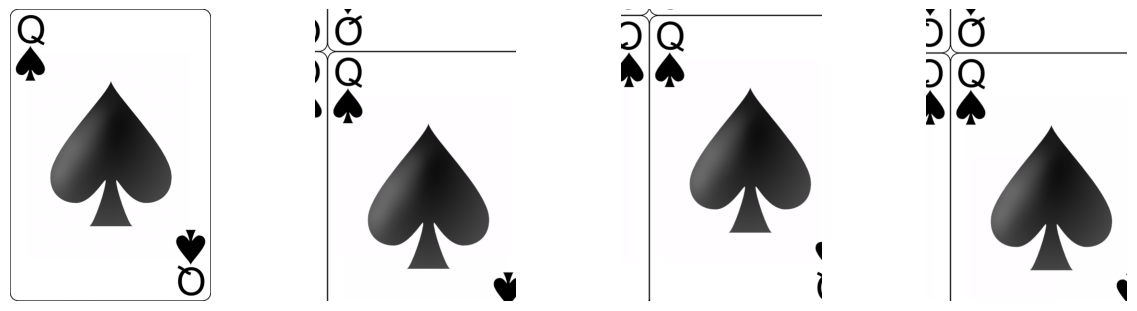

In [18]:
# Define a sequential model for image augmentation with random translation
augmentation = Sequential([
    layers.RandomTranslation(0.2,0.2),
])

# Set up the figure and grid layout for displaying images
fig = plt.figure(constrained_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], wspace=0.1)

# Display the original image
ax1 = fig.add_subplot(gs[0])
ax1.imshow(np.squeeze(img))
ax1.axis('off')

# Apply augmentation and display the first augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(np.squeeze(augmented_img))
ax2.axis('off')

# Apply augmentation again and display the second augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax3 = fig.add_subplot(gs[2])
ax3.imshow(np.squeeze(augmented_img))
ax3.axis('off')

# Apply augmentation again and display the third augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax4 = fig.add_subplot(gs[3])
ax4.imshow(np.squeeze(augmented_img))
ax4.axis('off')

# Show the figure with all images
plt.show()

#### Random Rotation

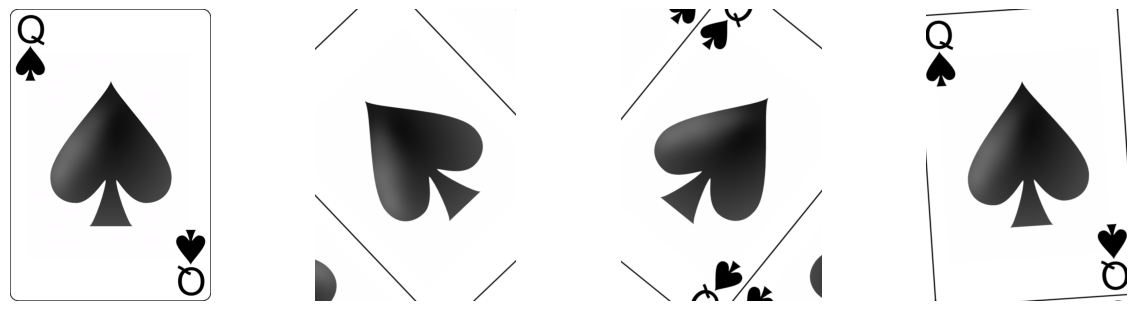

In [19]:
# Define a sequential model for image augmentation with random rotation
augmentation = Sequential([
    layers.RandomRotation(0.2),
])

# Set up the figure and grid layout for displaying images
fig = plt.figure(constrained_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], wspace=0.1)

# Display the original image
ax1 = fig.add_subplot(gs[0])
ax1.imshow(np.squeeze(img))
ax1.axis('off')

# Apply augmentation and display the first augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(np.squeeze(augmented_img))
ax2.axis('off')

# Apply augmentation again and display the second augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax3 = fig.add_subplot(gs[2])
ax3.imshow(np.squeeze(augmented_img))
ax3.axis('off')

# Apply augmentation again and display the third augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax4 = fig.add_subplot(gs[3])
ax4.imshow(np.squeeze(augmented_img))
ax4.axis('off')

# Show the figure with all images
plt.show()

### Random Zoom

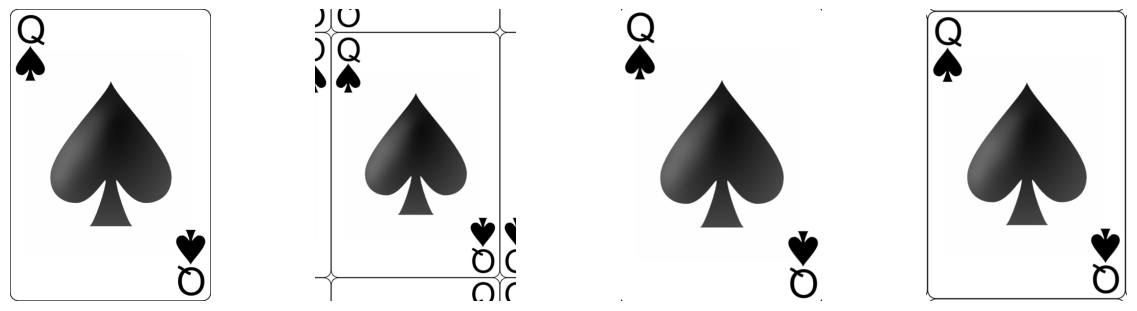

In [20]:
# Define a sequential model for image augmentation with random zoom
augmentation = Sequential([
    layers.RandomZoom(0.2),
])

# Set up the figure and grid layout for displaying images
fig = plt.figure(constrained_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], wspace=0.1)

# Display the original image
ax1 = fig.add_subplot(gs[0])
ax1.imshow(np.squeeze(img))
ax1.axis('off')

# Apply augmentation and display the first augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(np.squeeze(augmented_img))
ax2.axis('off')

# Apply augmentation again and display the second augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax3 = fig.add_subplot(gs[2])
ax3.imshow(np.squeeze(augmented_img))
ax3.axis('off')

# Apply augmentation again and display the third augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax4 = fig.add_subplot(gs[3])
ax4.imshow(np.squeeze(augmented_img))
ax4.axis('off')

# Show the figure with all images
plt.show()

### Random Brightness

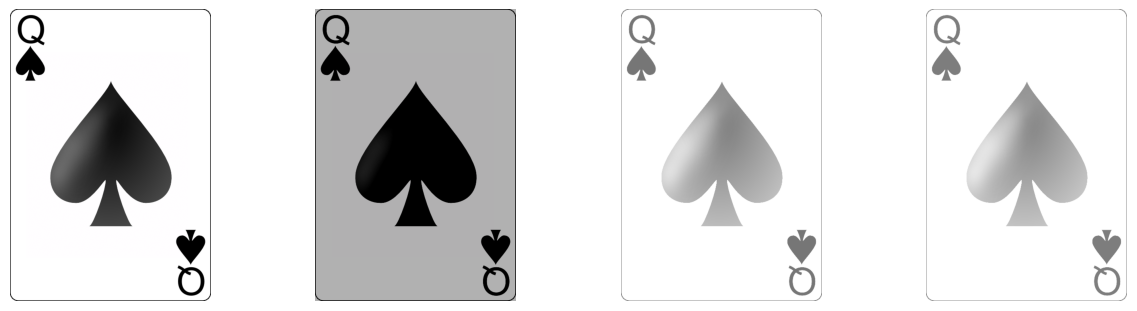

In [21]:
# Define a sequential model for image augmentation with random brightness
augmentation = Sequential([
    layers.RandomBrightness(0.5, value_range=(0,1)),
])

# Set up the figure and grid layout for displaying images
fig = plt.figure(constrained_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], wspace=0.1)

# Display the original image
ax1 = fig.add_subplot(gs[0])
ax1.imshow(np.squeeze(img))
ax1.axis('off')

# Apply augmentation and display the first augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(np.squeeze(augmented_img))
ax2.axis('off')

# Apply augmentation again and display the second augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax3 = fig.add_subplot(gs[2])
ax3.imshow(np.squeeze(augmented_img))
ax3.axis('off')

# Apply augmentation again and display the third augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax4 = fig.add_subplot(gs[3])
ax4.imshow(np.squeeze(augmented_img))
ax4.axis('off')

# Show the figure with all images
plt.show()

### Random Contrast

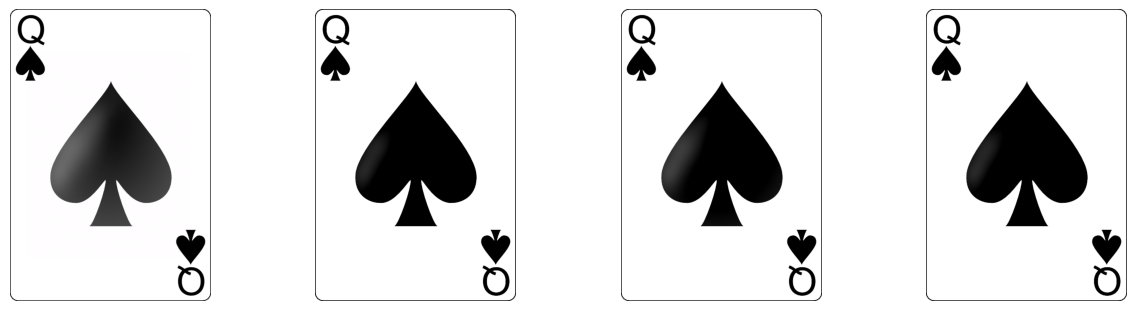

In [22]:
# Define a sequential model for image augmentation with random contrast
augmentation = Sequential([
    layers.RandomContrast(0.75),
])

# Set up the figure and grid layout for displaying images
fig = plt.figure(constrained_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], wspace=0.1)

# Display the original image
ax1 = fig.add_subplot(gs[0])
ax1.imshow(np.squeeze(img))
ax1.axis('off')

# Apply augmentation and display the first augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(np.squeeze(augmented_img))
ax2.axis('off')

# Apply augmentation again and display the second augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax3 = fig.add_subplot(gs[2])
ax3.imshow(np.squeeze(augmented_img))
ax3.axis('off')

# Apply augmentation again and display the third augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax4 = fig.add_subplot(gs[3])
ax4.imshow(np.squeeze(augmented_img))
ax4.axis('off')

# Show the figure with all images
plt.show()

In [61]:
def place_card_on_background(card_img, background_img, card_relative_size=0.7, output_size=(416, 416)):
    """
    Resizes a card image and places it centered on a background image,
    with final output size of 416x416 pixels.
    
    Parameters:
        card_img: The playing card image (RGB or BGR)
        background_img: Background image (RGB or BGR)
        card_relative_size: Size of the card relative to output size (0.0-1.0)
        output_size: Tuple (width, height) for the final output image
    
    Returns:
        Augmented image with the card centered on the background, sized 416x416
    """
    # Make sure images are in the correct format
    if card_img.dtype != np.uint8:
        card_img = (card_img * 255).astype(np.uint8)
    
    if background_img.dtype != np.uint8:
        background_img = (background_img * 255).astype(np.uint8)
    
    # First resize the background to the output size
    resized_background = cv2.resize(background_img, output_size)
    
    # Calculate card size based on relative size parameter
    card_width = int(output_size[0] * card_relative_size)
    card_height = int(output_size[1] * card_relative_size)
    
    # Resize the card
    resized_card = cv2.resize(card_img, (card_width, card_height))
    
    # Calculate position to center the card
    x_offset = (output_size[0] - card_width) // 2
    y_offset = (output_size[1] - card_height) // 2
    
    # Create a copy of the background
    result = resized_background.copy()
    
    # Place the card on the background
    result[y_offset:y_offset+card_height, x_offset:x_offset+card_width] = resized_card
    
    return result


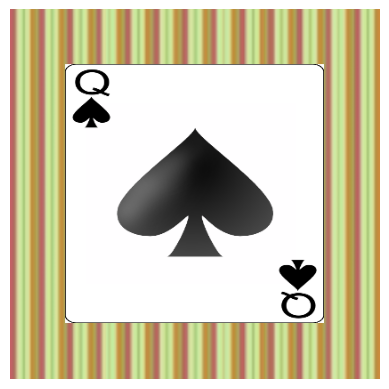

In [62]:
new= cv2.imread("data/52_cards/dtd/images/banded/banded_0002.jpg")
# Resize the new background image to match the size of the original image
new = cv2.resize(new, (img.shape[1], img.shape[0]))
# Convert the new background image to RGB format
new = cv2.cvtColor(new, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)
# Ensure both images have the same data type
new = new.astype(np.float32) / 255.0  # Normalize `new` to match `img`'s range (0.0 to 1.0)
overlaid = place_card_on_background(img,new)
# Display the overlaid image
plt.imshow(overlaid)
plt.axis('off')
plt.show()

In [63]:
print(overlaid.shape)

(416, 416, 3)


In [ ]:
#let's apply superimposition for everybackground image
# Load the background images
background_dir = "data/52_cards/dtd/images/"
def background_data(background_dir, img):
    """
    Load background images from the specified directory.
    
    Parameters:
        background_dir: Directory containing background images.
        
    Returns:
        List of loaded background images.
    """
    overlaid_images = []
    for background in background_dir:
        #load the image
                    # Resize the background image to match the size of the original image
        new = cv2.resize(background, (img.shape[1], img.shape[0]))
        # Convert the new background image to RGB format
        new = cv2.cvtColor(new, cv2.COLOR_BGR2RGB)
        # Ensure both images have the same data type
        new = new.astype(np.float32) / 255.0
        img = img.astype(np.float32)
        # Apply the place_card_on_background function
        overlaid = place_card_on_background(img, new)
        # Append the overlaid image to the list
        overlaid_images.append(overlaid)
    return overlaid_images


### All together

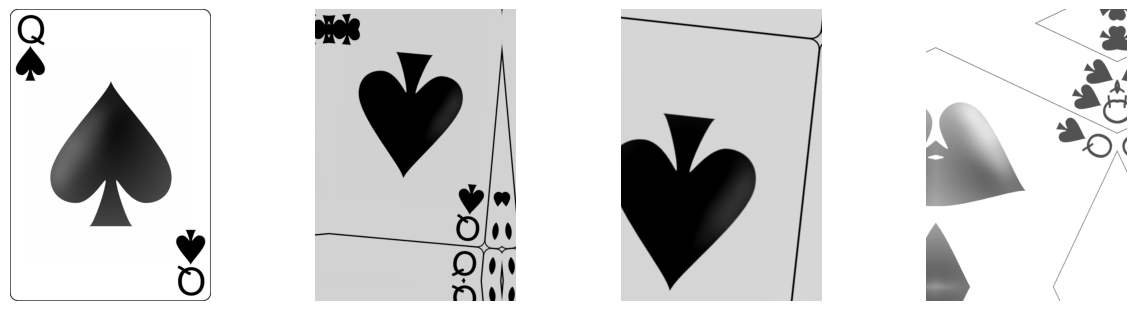

In [23]:
# Define a sequential model for image augmentation with various transformations
augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomTranslation(0.2,0.2),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.5, value_range=(0,1)),
    layers.RandomContrast(0.75),
], name='Augmentation')



# Set up the figure and grid layout for displaying images
fig = plt.figure(constrained_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], wspace=0.1)

# Display the original image
ax1 = fig.add_subplot(gs[0])
ax1.imshow(np.squeeze(img))
ax1.axis('off')

# Apply augmentation and display the first augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax2 = fig.add_subplot(gs[1])
ax2.imshow(np.squeeze(augmented_img))
ax2.axis('off')

# Apply augmentation again and display the second augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax3 = fig.add_subplot(gs[2])
ax3.imshow(np.squeeze(augmented_img))
ax3.axis('off')

# Apply augmentation again and display the third augmented image
augmented_img = np.clip(augmentation(img).detach().cpu().numpy(), 0., 1.)
ax4 = fig.add_subplot(gs[3])
ax4.imshow(np.squeeze(augmented_img))
ax4.axis('off')

# Show the figure with all images
plt.show()